# Water Use efficiency model



In [7]:
from graphmodels.graphmodel import GraphModel

# 1. Define the model

In [2]:
EW1_nodes = {'IWU': {'type': 'input',
                     'name': 'Industrial Water Withdrawal',
                     'unit': '1e9 m3/year'},
             'MWU': {'type': 'input',
                     'name': 'Municipal Water Withdrawal',
                     'unit': '1e9 m3/year'},
             'AWU': {'type': 'input',
                     'name': 'Agricultural Water Withdrawal',
                     'unit': '1e9 m3/year'},
             'TWW': {'type': 'variable',
                     'name': 'Total Water Withdrawal',
                     'unit': '1e9 m3/year',
                     'computation': lambda AWU, IWU, MWU, **kwargs: AWU + IWU + MWU
                     },
             'AGVA': {'type': 'parameter',
                      'name': 'Agricultural Gross Value Added',
                      'unit': '$'},
             'IGVA': {'type': 'parameter',
                      'name': 'Industrial Gross Value Added',
                      'unit': '$'},
             'SGVA': {'type': 'parameter',
                      'name': 'Service Sector Gross Value Added',
                      'unit': '$'},
             'EW1': {'type': 'output',
                     'name': 'Water Use Efficiency',
                     'unit': '$/(m3/year)',
                     'computation': lambda TWW, IGVA, SGVA, AGVA, **kwargs: (IGVA + SGVA + AGVA) / (TWW * 1e9)
                     }
            }

EW1_model = GraphModel(EW1_nodes)

# 2. Vizualise the model

## As a graphical model

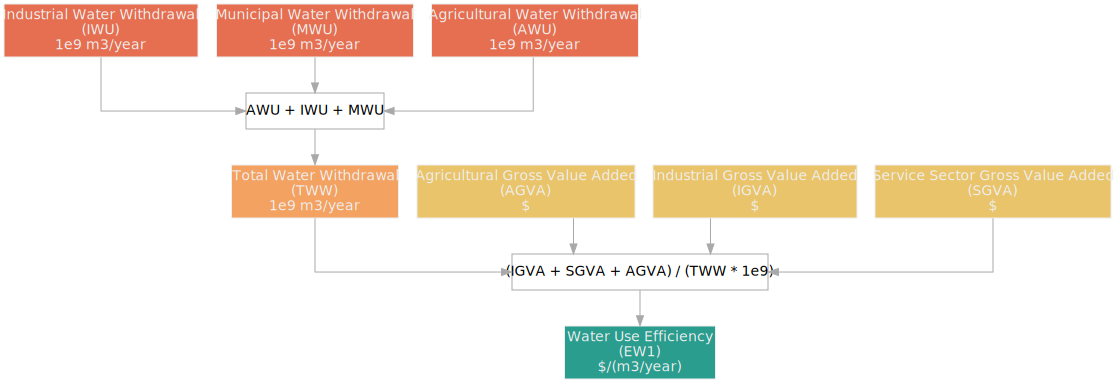

In [3]:
EW1_model.draw()

## As a table

In [8]:
EW1_model.summary_df

,name,type,unit,computation
id,,,,
IWU,Industrial Water Withdrawal,input,1e9 m3/year,NaN
MWU,Municipal Water Withdrawal,input,1e9 m3/year,NaN
AWU,Agricultural Water Withdrawal,input,1e9 m3/year,NaN
TWW,Total Water Withdrawal,variable,1e9 m3/year,AWU + IWU + MWU
AGVA,Agricultural Gross Value Added,parameter,$,NaN
IGVA,Industrial Gross Value Added,parameter,$,NaN
SGVA,Service Sector Gross Value Added,parameter,$,NaN
EW1,Water Use Efficiency,output,$/(m3/year),(IGVA + SGVA + AGVA) / (TWW * 1e9)


# 3. Make computations

Here we take the value of Hungary 2012 as an example

In [9]:
X = {
    "IWU": 4.013,
    "MWU": 0.716,
    "AWU": 0.322,
    "AGVA": 3.654131e+09,
    "IGVA": 3.255331e+10,
    "SGVA": 7.661930e+10
}

EW1_model.run(X)

{'IWU': 4.013,
 'MWU': 0.716,
 'AWU': 0.322,
 'AGVA': 3654131000.0,
 'IGVA': 32553310000.0,
 'SGVA': 76619300000.0,
 'TWW': 5.051,
 'EW1': 22.33750564244704}

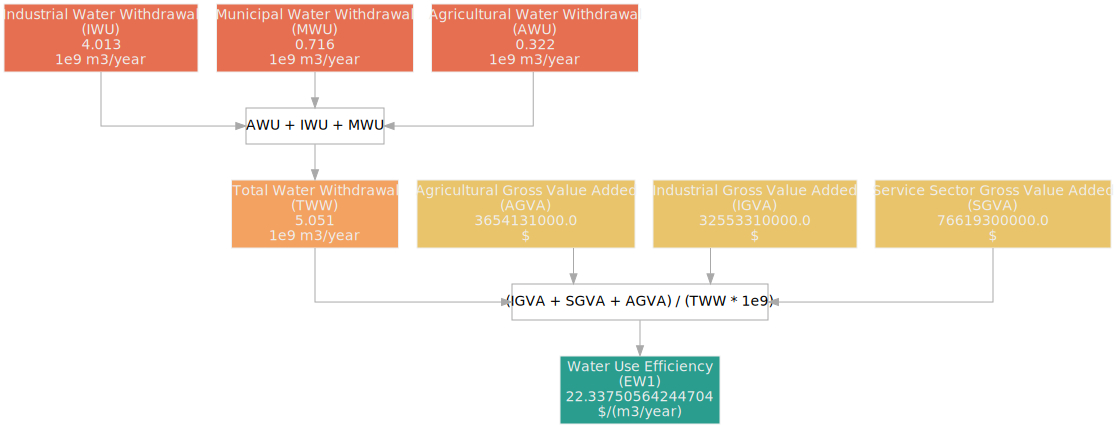

In [10]:
EW1_model.draw_computation(X)